# Visualizing my twitter network
A big thank you to Steve Hedden and his blogpost (linked in the references)

I diverted slightly from the tutorial as I was running into an error in one of the semi-final steps. I outline what i did differently, below. Overall I discovered that I follow people from to mostly 5 different twitter communities, which was interesting to find out! For next time, I would like to include the screen name on the nodes.


In [1]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import networkx as nx

As instructed in the tutorial, create a developer account on twitter to get access to these credentials

In [3]:
#credentials
consumer_key="XXXXXXXXXXXXXXXXXXXXXX"
consumer_secret="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
access_token="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
access_token_secret="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

In [4]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True,compression=True)

In [5]:
me=api.get_user(screen_name="aria68632")
me.id

552192443

In [10]:
#creating edge dataframe
#retrieve list of followers
user_list=["552192443"]
follower_list=[]
for user in user_list:
    followers=[]
    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)

191


In [11]:
#put list of followers into dataframe
df=pd.DataFrame(columns=["source", "target"]) #empty dataframe
df['target']=follower_list[0] #set the list of followers as the target column
df['source']=552192443 #my userid is the source


In [15]:
df

,source,target
0,552192443,1210627806
1,552192443,887011010535505920
2,552192443,16995996
3,552192443,58017706
4,552192443,828753839427878913
...,...,...
186,552192443,535712765
187,552192443,527695853
188,552192443,231894509
189,552192443,111957881


In [13]:
G=nx.from_pandas_edgelist(df,"source","target") #turn df into graph
pos=nx.spring_layout(G) #specify layout for viz

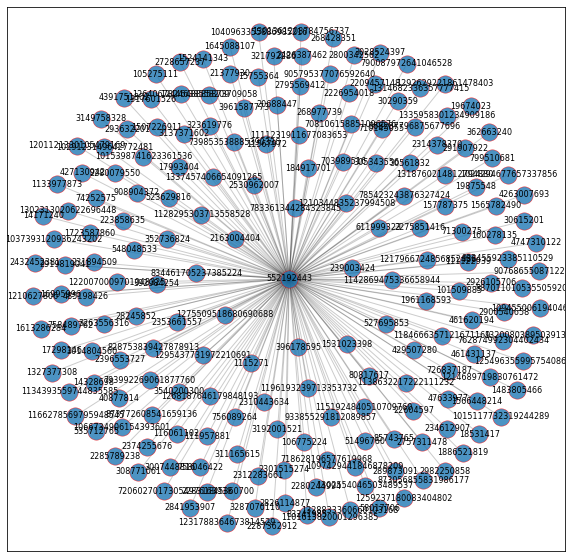

In [14]:
import matplotlib.pyplot as plt 
f,ax=plt.subplots(figsize=(10,10))
plt.style.use('ggplot')
nodes=nx.draw_networkx_nodes(G,pos,alpha=0.8)
nodes.set_edgecolor('r')
nx.draw_networkx_labels(G,pos,font_size=8)
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.2)

In [15]:
# get the followers of my 191 followers
user_list=list(df['target'])# list of my 191 followers

for userID in user_list:
    print(userID)
    followers=[]
    follower_list=[]

    # fetching the user
    user=api.get_user(userID)
    #fetching the followers_count
    followers_count=user.followers_count

    try:
        for page in tweepy.Cursor(api.followers_ids,user_id=userID).pages():
            followers.extend(page)#grow the list,instead of creating a list of lists
            #print(len(followers))
            if followers_count >= 5000: #take only the first 5000
                break
    except tweepy.TweepError:
        print('error')
        continue
    follower_list.append(followers)
    temp=pd.DataFrame(columns=['source','target'])
    temp['target']=follower_list[0]
    temp['source']=userID
    df=df.append(temp)
    df.to_csv("FariaNetworkofFollowers.csv")




1210627806
887011010535505920
error
16995996
58017706
828753839427878913
1094550061940465664
1961168593
1214689719830761472
30615201
1275509518680690688
1138632217222111232
1302554046503489537
790087972641046528
1524141343
19674023
Rate limit reached. Sleeping for: 860
error
111122939
1337457406654091265
3014804560
error
1335958301234909186
106775224
1320080389503913985
1645088107
1328833360660103168
1318760214812794880
74252575
17298146
845360700
1314682336357777415
83241985
105275111
1024294677657337856
Rate limit reached. Sleeping for: 891
error
1196193239713353732
1259237180083404802
1295437731972210691
793992269061877760
2353661557
2757311478
305343556
2800342562
1111231911677083653
1097429441846878209
1029123149642772481
2374255676
2280079550
error
1166278569795948545
1220070009701048325
1302313020622696448
Rate limit reached. Sleeping for: 892
error
1301361208784756737
762874992304402434
485198426
429507280
2982250858
30290359
1142869475336658944
611999323
14328698
1292629221861

In [2]:
df=pd.read_csv("FariaNetworkofFollowers.csv") #read the new csv
G= nx.from_pandas_edgelist(df,'source','target')# turn df into a graph, using networkX


In [6]:
G.number_of_nodes() #find the total number of nodes in this graph

122117

In [3]:
# find the most influential nodes in the network using centrality
#this code finds the number of connections of each node, the degree of each node, and sorts them in descending order
G_sorted=pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))# true means sort in descending order
#key with lambda function returns the second element in the degree list
G_sorted.columns=['nsconst','degree']
G_sorted.head()

,nsconst,degree
0,2.728657e+09,5004
1,4.263008e+09,5003
2,1.115271e+06,5003
3,1.156797e+07,5002
4,1.987555e+07,5002


In [8]:
G_sorted.iloc[1]["nsconst"]

4263007693.0

In [5]:
G_tmp=nx.k_core(G,5) #take nodes from 122k to 684 nodes
#degree of node is the number of connections it has to other nodes. I think 5 connections is good for my small network

In [24]:
len(G_tmp)

1259

In [39]:
#pip install community

  Created wheel for community: filename=community-1.0.0b1-py3-none-any.whl size=2160 sha256=300be945d61746bafbb393a9ec9b479b773fe316c305488dbfb5a92f21a56dfd
  Stored in directory: c:\users\faria\appdata\local\pip\cache\wheels\82\c4\04\d1a2e10b418aae6a1f7135eb20be8f2fb447d967f02f6afb3d
Successfully built community



In [46]:
#pip install python_louvain

  Created wheel for python-louvain: filename=python_louvain-0.15-py3-none-any.whl size=9405 sha256=1a85980beda8eecc8ef1a64559da75e4b7973f1b2363c9bef2a1c870837ac239
  Stored in directory: c:\users\faria\appdata\local\pip\cache\wheels\c8\68\21\d04741956802581119d875a0d9fce6895e8f9ffae71223f3e3
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


In [6]:
# easier to do network analytics on small graph, split the graph into groups using community detecting algorithm
from community import community_louvain
partition=community_louvain.best_partition(G_tmp)

#turn partition into a dataframe:
partition1=pd.DataFrame([partition]).T
partition1=partition1.reset_index()
partition1.columns=['names','groups']


In [5]:
partition1.head()

,names,groups
0,1.214690e+18,0
1,1.138632e+18,1
2,7.900880e+17,0
3,1.320080e+18,1
4,1.196193e+18,1


In [7]:
# since network is smaller, degree centrality code needs to be run again
G_sorted=pd.DataFrame(sorted(G_tmp.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns=['names','degree']
dc=G_sorted
G_sorted.head()

,names,degree
0,1.015099e+08,173
1,2.137793e+07,172
2,2.374256e+09,165
3,1.799340e+07,163
4,2.260460e+07,146


In [28]:
len(partition1)

684

In [13]:
len(dc)

684

This is where I diverted a bit from the tutorial. When I combined the datasets, I ended up with 708 rows but the graph that was being used only had 684 nodes because each individual dataset has 684 rows. Because i couldn't assimilate the number of rows, i did not use the merged dataset. Instead I used the necessary columns from the individual datasets to create the image below

In [15]:
combined=pd.merge(dc, partition1, how='left', left_on='names', right_on='names')
#two different datasets, 1 wehere the nodes are split into groups and the other where the degrees of each node is shown
combined.head()

,names,degree,groups
0,1.015099e+08,173,2
1,2.137793e+07,172,0
2,2.374256e+09,165,2
3,1.799340e+07,163,0
4,2.260460e+07,146,1


In [16]:
len(combined)

708

In [9]:
combined.tail()

,names,degree,groups
703,29548502.0,5,0
704,1523681.0,5,1
705,80660457.0,5,0
706,33552373.0,5,1
707,276948985.0,5,2


In [44]:
combined['groups']

0      2
1      0
2      2
3      0
4      1
      ..
703    0
704    1
705    0
706    1
707    2
Name: groups, Length: 708, dtype: int64

In [22]:
G_tmp

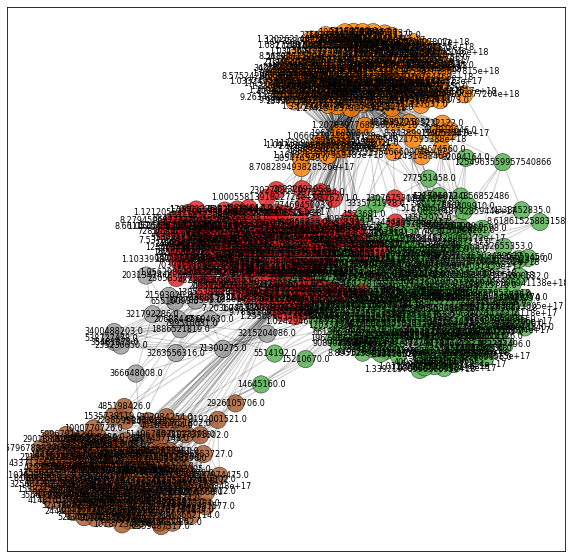

In [8]:
pos = nx.spring_layout(G_tmp)
f, ax=plt.subplots(figsize=(10,10))
plt.style.use('ggplot')

#cc=nx.betweenness_centrality(G_tmp)
#betweenness centrality of a noce is the sum of the fractions of all pairs shortest pahths

nodes=nx.draw_networkx_nodes(G_tmp, pos, cmap=plt.cm.Set1, node_color=partition1['groups'], alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G_tmp, pos, font_size=8)

nx.draw_networkx_edges(G_tmp, pos, width=1.0, alpha=0.2)
plt.savefig('FariaTwitterFollowers.png')

#figure out how to colour nodes based on groups
#https://stackoverflow.com/questions/57113398/matplotlib-scatter-fails-with-error-c-argument-has-n-elements-which-is-not-a



In [9]:
partition1=partition1.rename(columns={"names": "Id"}) #Gephi prefers node column to be called ID
edges=nx.to_pandas_edgelist(G_tmp)
nodes=partition1['Id']

edges.to_csv("edges.csv")
partition1.to_csv("nodes.csv")



The exported csv files were uploaded to Gephi and the network graph was structured and manipulated using different parameters. The final social network graph is displayed below

![alt text](fariasna1.png "SNA")

# References

https://towardsdatascience.com/how-to-download-and-visualize-your-twitter-network-f009dbbf107b
https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python
